In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------- LOAD DATA -----------------
df = pd.read_csv(r"C:\Users\Wahid\Downloads\iris-parquet.csv")

target_col = 'variety'  

print("Unique labels:", df[target_col].unique())
print(df[target_col].value_counts())

# ================= OLD MODEL =================
df_old = df.copy()  

X_old = df_old.drop(columns=[target_col])
y_old = df_old[target_col]

X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(
    X_old, y_old, test_size=0.2, random_state=42, stratify=y_old
)

scaler_old = StandardScaler()
X_train_old_scaled = scaler_old.fit_transform(X_train_old)
X_test_old_scaled = scaler_old.transform(X_test_old)

model_old = LogisticRegression(max_iter=500)
model_old.fit(X_train_old_scaled, y_train_old)

y_pred_old = model_old.predict(X_test_old_scaled)

print("\n=== OLD MODEL RESULTS ===")
print("Accuracy:", accuracy_score(y_test_old, y_pred_old))
print("\nClassification Report:\n", classification_report(y_test_old, y_pred_old))
print("Confusion Matrix:\n", confusion_matrix(y_test_old, y_pred_old))

Unique labels: ['Setosa' 'Versicolor' 'Virginica']
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

=== OLD MODEL RESULTS ===
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [3]:
import pandas as pd 
import numpy as np
import matplotlib as plt
df =pd.read_csv(r"C:\Users\Wahid\Downloads\iris-parquet.csv")
print(df.head(20))

    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8         

In [4]:
df["sepal_area"] = df["sepal.length"] * df["sepal.width"]
df["petal_area"] = df["petal.length"] * df["petal.width"]
print(df.head(10))

   sepal.length  sepal.width  petal.length  petal.width variety  sepal_area  \
0           5.1          3.5           1.4          0.2  Setosa       17.85   
1           4.9          3.0           1.4          0.2  Setosa       14.70   
2           4.7          3.2           1.3          0.2  Setosa       15.04   
3           4.6          3.1           1.5          0.2  Setosa       14.26   
4           5.0          3.6           1.4          0.2  Setosa       18.00   
5           5.4          3.9           1.7          0.4  Setosa       21.06   
6           4.6          3.4           1.4          0.3  Setosa       15.64   
7           5.0          3.4           1.5          0.2  Setosa       17.00   
8           4.4          2.9           1.4          0.2  Setosa       12.76   
9           4.9          3.1           1.5          0.1  Setosa       15.19   

   petal_area  
0        0.28  
1        0.28  
2        0.26  
3        0.30  
4        0.28  
5        0.68  
6        0.42  
7 

In [5]:
print("shape  rows, colums ==",df.shape)

shape  rows, colums == (150, 7)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
 5   sepal_area    150 non-null    float64
 6   petal_area    150 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.3+ KB
None


In [7]:
print(df.describe())

       sepal.length  sepal.width  petal.length  petal.width  sepal_area  \
count    150.000000   150.000000    150.000000   150.000000  150.000000   
mean       5.843333     3.057333      3.758000     1.199333   17.822867   
std        0.828066     0.435866      1.765298     0.762238    3.361854   
min        4.300000     2.000000      1.000000     0.100000   10.000000   
25%        5.100000     2.800000      1.600000     0.300000   15.660000   
50%        5.800000     3.000000      4.350000     1.300000   17.660000   
75%        6.400000     3.300000      5.100000     1.800000   20.325000   
max        7.900000     4.400000      6.900000     2.500000   30.020000   

       petal_area  
count  150.000000  
mean     5.794067  
std      4.712390  
min      0.110000  
25%      0.420000  
50%      5.615000  
75%      9.690000  
max     15.870000  


In [8]:
print(df.isnull().sum()) 


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
sepal_area      0
petal_area      0
dtype: int64


In [9]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'sepal_area', 'petal_area']]
y = df['variety']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (120, 6) Test size: (30, 6)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)
print("\n=== NEW  MODEL RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== NEW  MODEL RESULTS ===
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [19]:
print(f"Old Data Accuracy=====: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test_old, y_pred_old))

print(f"\nNew Data Accuracy====: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Old Data Accuracy=====: 1.0000
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


New Data Accuracy====: 1.0000
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



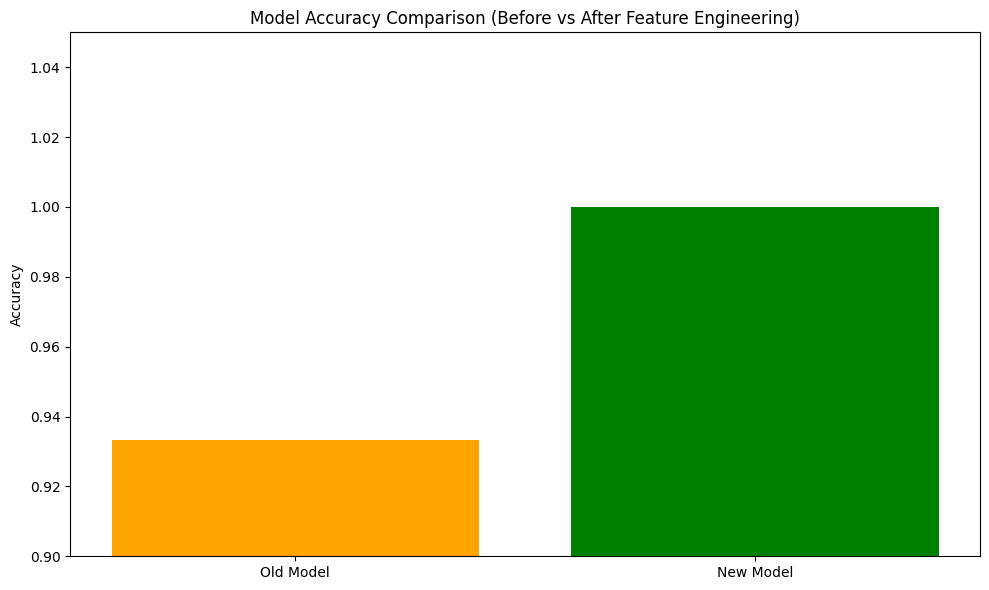

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
 
models = ["Old Model", "New Model"]
accuracy = [0.9333, 1.0]

plt.bar(models, accuracy, color=["orange", "green"])
plt.ylim(0.9, 1.05)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Before vs After Feature Engineering)")
plt.tight_layout()
plt.show()

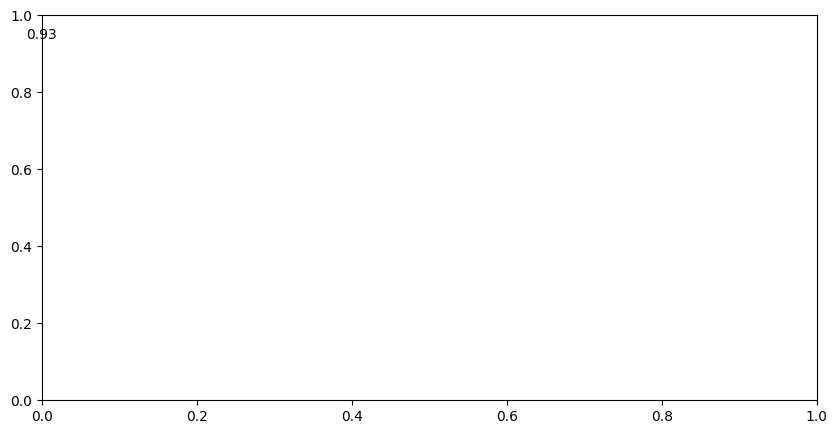

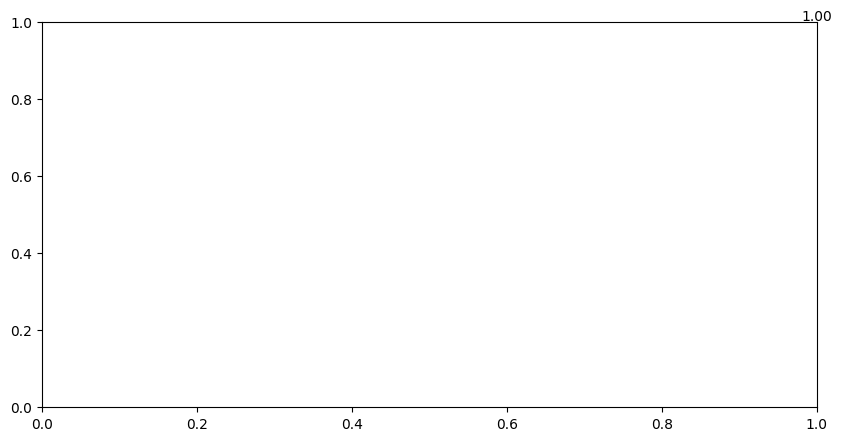

In [88]:
for i, acc in enumerate(accuracy):
    plt.figure(figsize=(10, 5))
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center')
    

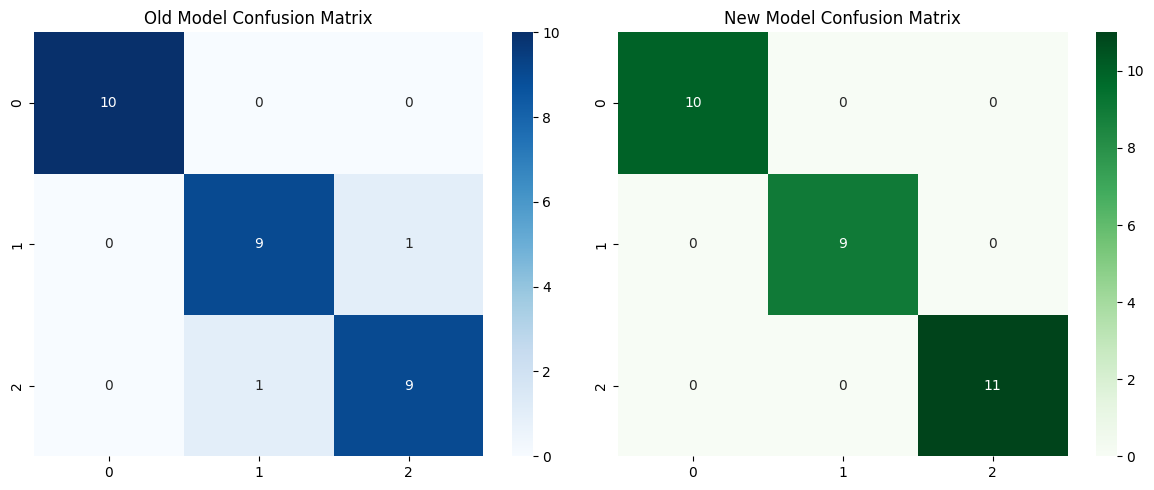

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Old CM
sns.heatmap([[10,0,0],[0,9,1],[0,1,9]], annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Old Model Confusion Matrix")

# New CM
sns.heatmap([[10,0,0],[0,9,0],[0,0,11]], annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("New Model Confusion Matrix")
plt.tight_layout()
plt.show()

In [21]:
acc_old = accuracy_score(y_test_old, y_pred_old)
acc_new = accuracy_score(y_test, y_pred)

print(f"\nOld Data Accuracy: {acc_old:.4f}")
print(f"New Data Accuracy: {acc_new:.4f}")


Old Data Accuracy: 0.9333
New Data Accuracy: 1.0000


In [20]:
import os
import joblib

# User ke Downloads folder ka path
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# agar new dataset ka model best hua
if acc_new > acc_old:
    model_path = os.path.join(downloads_path, "model_new_new.pkl")
    scaler_path = os.path.join(downloads_path, "scaler_new_new.pkl")
    joblib.dump(model, model_path)
    joblib.dump(scaler, scaler_path)
    print(f"✅ New model & scaler saved in {downloads_path}")
else:
    model_path = os.path.join(downloads_path, "best_model.pkl")
    scaler_path = os.path.join(downloads_path, "best_scaler.pkl")
    joblib.dump(model_old, model_path)
    joblib.dump(scaler_old, scaler_path)
    print(f"✅ Old model & scaler saved in {downloads_path}")


✅ New model & scaler saved in C:\Users\Wahid\Downloads
